In [1]:
# Loading libraries
suppressPackageStartupMessages(library(scuttle))
suppressPackageStartupMessages(library(scran))
suppressPackageStartupMessages(library(scater))
suppressPackageStartupMessages(library(uwot))
suppressPackageStartupMessages(library(SingleCellExperiment))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(HDF5Array))
suppressPackageStartupMessages(library(GEDI))
suppressPackageStartupMessages(library(SeuratData))
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(Seurat))
set.seed(42)                    

In [3]:
model <- readRDS("/home/arsham79/scratch/nsclc/results/GEDI_model.rds")

In [4]:
#model$plotTracking()

In [4]:
svd_res <- svd.gedi( model )
embedding_res_svd<- svd_res$v %*% diag(svd_res$d)
colnames(embedding_res_svd)<- paste0("embedding", 1:ncol(embedding_res_svd))

# Generating umap of 2 dimensions
umap_2_res <- umap(embedding_res_svd, min_dist=0.01, metric="euclidean")
colnames(umap_2_res)<- paste0("umap", 1:2)
rownames(umap_2_res)<- model$aux$cellIDs
umap_2_res<- data.frame(umap_2_res)

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’



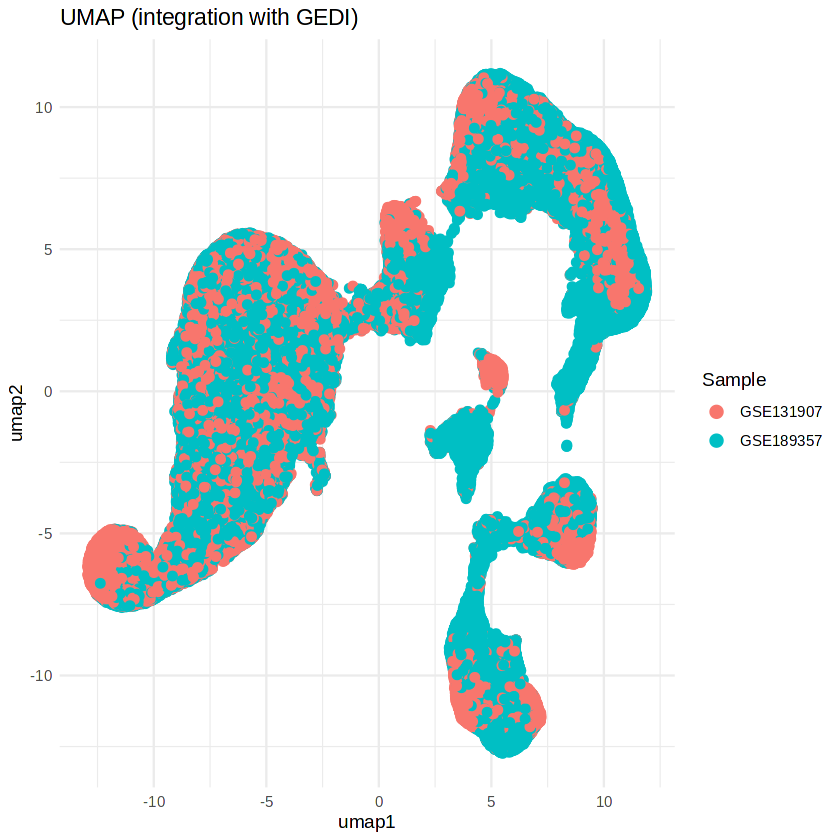

In [14]:
## Plot embeddings
plot_embedding(umap_2_res, model$aux$colData$GEO, size_point=2) + labs(x="umap1", y="umap2", title="UMAP (integration with GEDI)", color="Sample")

In [2]:
head(umap_2_res)

ERROR: Error in eval(expr, envir, enclos): object 'umap_2_res' not found
